In [5]:
import pandas as pd
import numpy as np
import calendar
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [6]:
def integer_encoding(df, series_name):

    # Find unique categorical labels
    unique_labels = df[series_name].unique()

    # Translate str label into simple numerical label e.g. 0, 1, 2, 3, ..., n
    # where n is the number of labels
    encoding_dict = {unique_labels[i]: i for i in range(len(unique_labels))}

    # Replace the str labels with the numerical ones
    df = df.replace({series_name: encoding_dict})
    return df

In [7]:
data = pd.read_csv("Data/owid-covid-data_Ireland.csv", index_col = "date")

In [8]:
combined_data = pd.read_csv("Data/Combined_Dataset.csv")

In [9]:
data = data[(data.index >= "2020-03-01") & (data.index <= "2021-11-01")]
ireland_data = data[data['location'] == "Ireland"]

In [10]:
day_of_week = [calendar.day_name[pd.to_datetime(date).weekday()] for date in ireland_data.index]
ireland_data['day_of_the_week'] = day_of_week

In [11]:
ireland_data['cases_per_capita'] = ireland_data['total_cases'].divide(ireland_data['population'])
ireland_data['deaths_per_capita'] = ireland_data['total_deaths'].divide(ireland_data['population'])

ireland_data['new_cases_per_capita'] = ireland_data['cases_per_capita'].diff().fillna(0)
ireland_data['new_deaths_per_capita'] =ireland_data['deaths_per_capita'].diff().fillna(0)

In [12]:
adfuller(ireland_data['cases_per_capita'])

(1.5936081758263705,
 0.9978382724742292,
 14,
 596,
 {'1%': -3.4413696108194607,
  '5%': -2.8664016052801906,
  '10%': -2.569359115918202},
 -9511.623935049654)

In [13]:
ireland_data['cases_per_capita'] = ireland_data['total_cases'].divide(ireland_data['population'])
ireland_data['deaths_per_capita'] = ireland_data['total_deaths'].divide(ireland_data['population'])

ireland_data['new_cases_per_capita'] = ireland_data['new_cases'].divide(ireland_data['population'])
ireland_data['new_deaths_per_capita'] =ireland_data['new_deaths'].divide(ireland_data['population'])

In [14]:
ireland_data['new_cases_per_capita'].fillna(method = 'bfill', inplace = True)

In [15]:
ireland_data['new_deaths_per_capita'].fillna(method = 'bfill', inplace = True)

In [16]:
ireland_data['deaths_per_capita'].fillna(0, inplace = True)

In [17]:
ADF_cases = adfuller(ireland_data['cases_per_capita'])[0]
ADF_cases_diff = adfuller(ireland_data['new_cases_per_capita'] )[0]

In [18]:
ADF_deaths = adfuller(ireland_data['deaths_per_capita'])[0]
ADF_deaths_diff = adfuller(ireland_data['new_deaths_per_capita'])[0]

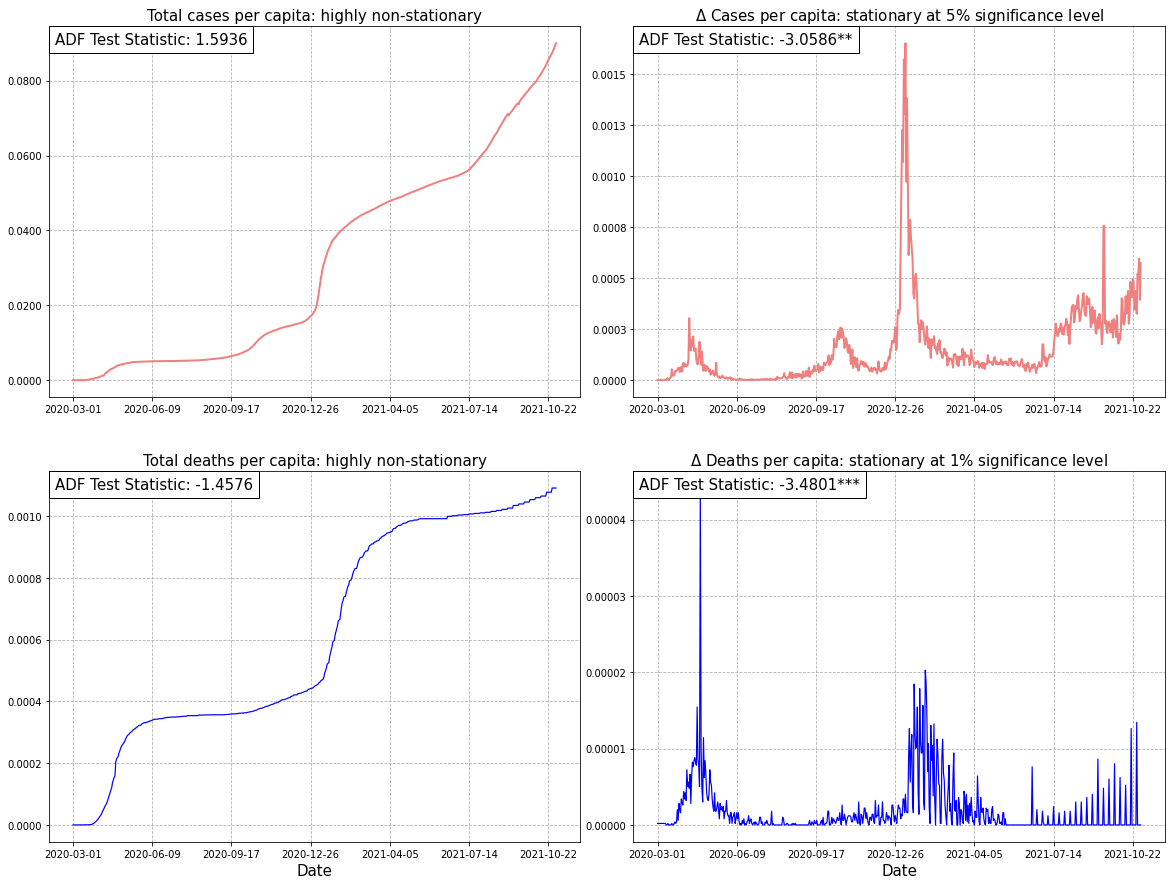

In [19]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 2,gridspec_kw={"wspace": 0.1})
fig.set_size_inches(20, 15)

ireland_data['cases_per_capita'].plot(ax = ax[0, 0], color = 'lightcoral', linewidth = 2)
ireland_data['new_cases_per_capita'].plot(ax = ax[0, 1], color = 'lightcoral', linewidth = 2)
ireland_data['deaths_per_capita'].plot(ax = ax[1, 0], color = 'blue', linewidth = 1.2)
ireland_data['new_deaths_per_capita'].plot(ax = ax[1, 1], color = 'blue', linewidth = 1.2)

ax[0, 0].set_xlabel("", fontsize = 15)
ax[0, 1].set_xlabel("", fontsize = 15)

ax[1, 0].set_xlabel("Date", fontsize = 15)
ax[1, 1].set_xlabel("Date", fontsize = 15)

ax[0, 0].set_title(r"Total cases per capita: highly non-stationary", fontsize = 15)
ax[0, 1].set_title(r"$\Delta$ Cases per capita: stationary at $5\%$ significance level", fontsize = 15)
ax[1,0].set_title(r"Total deaths per capita: highly non-stationary", fontsize = 15)
ax[1, 1].set_title(r"$\Delta$ Deaths per capita: stationary at $1\%$ significance level", fontsize = 15)

ax[0, 0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0, 1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1, 0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1, 1].yaxis.set_major_formatter(FormatStrFormatter('%.5f'))

from matplotlib.offsetbox import AnchoredText

anchored_text = AnchoredText(f"ADF Test Statistic: {round(ADF_cases, 4)}", loc = 2, borderpad=0.,frameon=True, 
                             prop=dict(size=15))

ax[0, 0].add_artist(anchored_text)

anchored_text_2 = AnchoredText(f"ADF Test Statistic: {round(ADF_cases_diff, 4)}**", loc = 2, borderpad=0.,frameon=True, 
                             prop=dict(size=15))

ax[0, 1].add_artist(anchored_text_2)

anchored_text_3 = AnchoredText(f"ADF Test Statistic: {round(ADF_deaths, 4)}", loc = 2, borderpad=0.,frameon=True, 
                             prop=dict(size=15))

ax[1, 0].add_artist(anchored_text_3)

anchored_text_4 = AnchoredText(f"ADF Test Statistic: {round(ADF_deaths_diff, 4)}***", loc = 2, borderpad=0.,frameon=True, 
                             prop=dict(size=15))

ax[1, 1].add_artist(anchored_text_4)

ax[0, 0].grid(linestyle = '--')
ax[0, 1].grid(linestyle = '--')
ax[1, 0].grid(linestyle = '--')
ax[1, 1].grid(linestyle = '--')